# Lab 10 - Radiation Shielding (Part 2)

Edit this cell and provide the information requested:

- Your name: 
- Your student number:
- Partner's name: 

In [1]:
%reset -f
import numpy as np
import data_entry2
import matplotlib.pyplot as plt

### Lab 9 Feedback

At the time of feedback, the TA mentioned that the uncertainty of time is negligible because it is such a small value during calucaltions. We include it in our calculations for the sake of the formula but if we took a limit, we would see that the uncertainty of time is negligible. 

### Discussed in Class

As we get more and more sheets of paper, the data starts to deviate. The reason for this deviation could be the background radiation from our surroundings so it might be a good idea to include this into our model. We can make a new model $log(R(x)) = log(R_0 e^{-\mu x} + R_b)$. Our new model has 3 fitting parameters, $R_0$, $\mu$, and $R_b$. Nnote that none of these parameters are treated as fixed so we would have modify their values
- in python we denote $e^{-\mu x}$ as np.exp(-mu*x)
- After modifying the model, we should adjust all three parameters to minimize chi-squared
- make sure to make a table to keep track of the three parameters values

The dataset used below is from my partner's data from her previous lab. At the time of completing this lab, I have not finished my submission for make-up lab 9 therefore we decided to use her data. Source ID of her data is Fe-55-01

In [2]:
de = data_entry2.sheet("lab10_data1.csv")

Sheet name: lab10_data1.csv


### Equipment 

- Radioactive Source:  Iron-55 emits low-energy gamma rays (5.9 keV). Source ID: Fe-55-01
- Geiger Counter: Counts the number of particles that interact with the detector. Counting apparatus is set to "Geiger Counter" and 450 V. The source-detector distance is set to 1.0 cm (on the ruler) and left at that distance throughout the lab.
- Paper Shielding Sheets: paper sheets of the same thickness used to attenuate the x-rays. Both single sheets and “5-packs” are available.
- Timer (Iphone stopwatch): Recorded actual measurement times in spreadsheet (the times entered into the spreadsheet also include fractions of a second)

### Measurement Strategy

- 5 trials each 6 minutes (counts include 0, 2, 5, 7, 10).
- We decided to let Lucy do the measurements for accuracy because she did it last time and we felt that she was more familiar 
- We also set a 6-minute timer to make sure that we end the stopwatch right at 6 minutes. 

### Initial Predictions


In [3]:
de = data_entry2.sheet("lab10_data2.csv")

Sheet name: lab10_data2.csv


In [4]:
de = data_entry2.sheet("lab10_datatrack.csv")

Sheet name: lab10_datatrack.csv


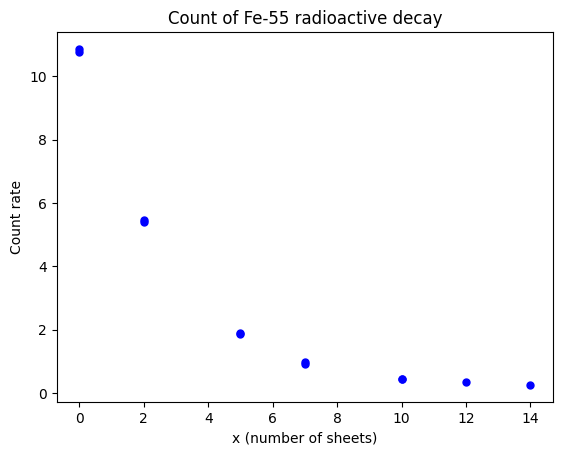

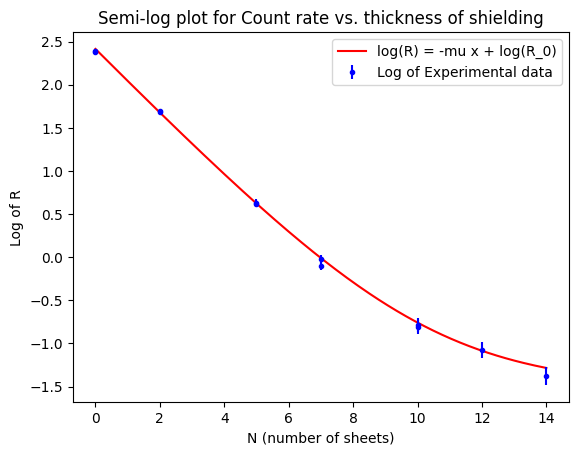

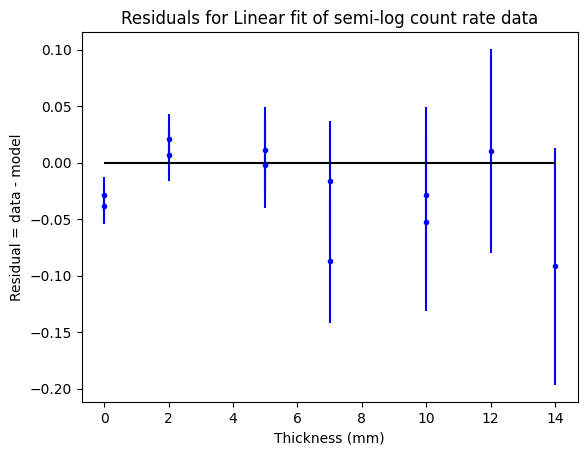

Chi-squared 1.375633831364136


In [5]:
uNVec = np.sqrt(NVec)
RateVec = NVec/tVec
Ntrials = len(tVec)
tave = np.mean(tVec)
utVec = utave = np.std(tVec,  ddof=1)/np.sqrt(Ntrials)

uRateVec = RateVec * np.sqrt(1/NVec + (utVec/tVec)**2)
logRateVec = np.log(RateVec)
ulogRateVec = uRateVec/RateVec


## Linear-linear plot

plt.plot(xVec, RateVec, "bo", markersize=5)
plt.title("Count of Fe-55 radioactive decay")
plt.xlabel("x (number of sheets)")
plt.ylabel("Count rate")
plt.show()

## Semi-Ln plot

yVec = logRateVec
uyVec = ulogRateVec

# DATA/MODEL PLOT
# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the model values (for linear model with intercept):
#################### MODIFY THE MODEL PARAMETERS #########################
R0 = 10.96249  # Replace ?? with the best fit intercept 
mu = 0.379999  # Replace ?? with the best fit slope
Rb= 0.22313016
##########################################################################
ypointsLinear = (R0 * np.exp(-mu * xpoints)) + Rb # this calculates the yvalues at all 200 points
ypoints = np.log(ypointsLinear) # this calculates the yvalues at all 200 points
# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0)")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Semi-log plot for Count rate vs. thickness of shielding")
plt.xlabel("N (number of sheets)")
plt.ylabel("Log of R")
plt.legend()
plt.show()


# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodel = np.log(R0 * np.exp(-mu * xVec) + Rb)

# Step 2: Calculate the residual vector
resVec = logRateVec - (ymodel)

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, resVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Linear fit of semi-log count rate data")
plt.xlabel("Thickness (mm)")
plt.ylabel("Residual = data - model")
plt.show()


# CHI-SQUARED CALCULATION
N = len(xVec)
P = 2  # 2 parameters; slope and intercept
weightedsquaredresVec = (resVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print("Chi-squared", chisquared)

## Improvements

In [6]:
de = data_entry2.sheet("lab10_data3.csv")

Sheet name: lab10_data3.csv


In [7]:
(0.01 * 2)/4

0.005

## Summary of Results

#### Goodness of Fit tools (residuals Graph, chi-squared) Comparison Between Labs
Question: Using your goodness of fit tools (residuals graph, chi-squared), compare your Lab 09 and Lab 10 models. In addition to comparing chi-squared, use your residuals graphs from each lab to discuss in which region(s) each model does a good job of describing the data and in which region(s) each model does a poor job. Compare this to the Lab 09 model

Answer:

#### Rb Comparison

Question: How does Rb, the background count rate predicted by the nonlinear model, compare to your direct measurement of the background count?

Answer: 

#### R0 Comparison

Question: How does R0  compare between Labs 09 and 10?

Answer: 

#### Attenuation Coefficient

Question: How does your attenuation coefficient, μ, compare between Labs 09 and 10? Would you expect these to be consistent with each other or different?

Answer: 

#### Other Group Comparison

Question: How do your results compare with other groups?

Answer:

# Submit

Steps for submission:

1. Click: Run => Run_All_Cells
2. Read through the notebook to ensure all the cells executed correctly and without error.
3. File => Save_and_Export_Notebook_As->HTML
4. Inspect your html file.
5. Upload the HTML document to the lab submission assignment on Canvas.

In [8]:
display_sheets()

Sheet: de   File: lab10_data3.csv


,N,t,x
Units,count,s,sheet
0,6641,600.12,0
1,,,
